# Исследовательский анализ рынка Москвы, среди точек общественного питания

## Цель проекта
Провести исследовательский анализ рынка Москвы для Инвесторов из фонда "Shut Up and Take My Money". 

## Задачи
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
4. Сформулировать выводы по проведённому анализу.

## Данные
`/datasets/rest_info.csv`- содержит информацию о заведениях общественного питания;

`/datasets/rest_price.csv` - содержит информацию о среднем чеке в заведениях общественного питания.

## Описание данных
#### Описание датасета `/datasets/rest_info.csv`:

`name` — название заведения;

`address` — адрес заведения;

`district` — административный район, в котором находится заведение, например Центральный дминистративный округ;

`category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;

`hours` — информация о днях и часах работы;

`rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);


`chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым;

1 — заведение является сетевым.

`seats` — количество посадочных мест.



#### Описание датасета  `/datasets/rest_price.csv`:

`price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;

`avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:

«Средний счёт: 1000–1500 ₽»;

«Цена чашки капучино: 130–220 ₽»;

«Цена бокала пива: 400–600 ₽».

и так далее;

`middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:

Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.

Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.

Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.

`middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:

Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.

Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.

Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.


## 1. Загрузка данных и знакомство с ними

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

Для начала выгрузим и познакомимся с предоставленными данными

In [2]:
df_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
df_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

In [3]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [4]:
df_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


Датасет `rest_info.csv` содержит в себе 8406 строк и 9 полей с информацией о заведение

После первичного анализа можно сделать следующие выводы:
1. Пропуски содержутся в полях `seats` и `hours`;
2. В датасете есть 3 числовых поля: `rating`, `chain`, `seats`. Размерность этих полей можно оптимизировать.



In [5]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [6]:
df_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


Датасет `rest_price.csv` содержит в себе 4058 строк и 5 полей с информацией о ценах

После первичного анализа можно сделать следуюшие выводы:
1. Пропуски содержутся во всех полях кроме id
2. В датастете есть 2 числовых поля `middle_avg_bill` и `middle_coffee_cup`. Размерность этих полей можно оптимизировать.

#### Вывод первичного анализа
1. Названия столбцов изначально приведены к стилю snake case, благодря чему, можно не изменять их названия;
2. Типы данных во всех полях соответсвуют значениях в них;
3. В датасете `rest_price.csv` находится много пропусков, нужно внимательно разобраться в причинах их появлений

В целом, данные находятся в хорошем и корректном виде.

## 2. Предобработка данных


### 2.1 Опимизируем типы данных
Оптимизируем целочисленные данные в обоих датасетах.

Будем использовать метод to_numeric.

In [7]:
# Начинаем с датафрейма df_info
# Опимизируем rating и seats во float , т.к. поле rating содержит дробное число (5 балльная оценка), а в поле seats есть пропуски.
for column in ['rating', 'seats']:
    df_info[column] = pd.to_numeric(df_info[column], downcast='float')
# В поле chain пропусков нет, поэтому его можно оптимизировать до integer
df_info['chain'] = pd.to_numeric(df_info['chain'], downcast='integer')

# Также оптимизируем df_price
# В обоих полях есть пропуски, поэтому используем float
for column in ['middle_avg_bill', 'middle_coffee_cup']:
    df_price[column] = pd.to_numeric(df_price[column], downcast='float')

Проверяем типы данных в наших датафреймах:


In [8]:
df_info.dtypes

id           object
name         object
category     object
address      object
district     object
hours        object
rating      float32
chain          int8
seats       float32
dtype: object

In [9]:
df_price.dtypes

id                    object
price                 object
avg_bill              object
middle_avg_bill      float32
middle_coffee_cup    float32
dtype: object

Оба датафрейма были успешно оптимизированы с помощью размернности данных.

In [10]:
# Объединим оба датафрейма в один
df = pd.merge(df_info, df_price, on='id', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: float32(4), int8(1), object(8)
memory usage: 730.6+ KB


Мы используем метод "left", чтобы не потерять важную информацию о точках питания.

### 2.2. Проверяем наличие пропусков в данных

При первичном анализе в датафреймах были обнаружены пропуски. Изучим сколько пропусков и какая их доля. А также выдвинем гипотезы о том, чем могли они быть вызаны.

In [11]:
# Считаем количество пропусков
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [12]:
# Вычисляем долю пропусков
df.isna().sum() / len(df)

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

Возможные причины пропусков в полях с ними:

Поле `hours`, содержит 536 или 6% пропусков:
1. Заведение работает круглосуточно, поэтому не передали данные;
2. Заведение было закрыто/переехало и удалило данные о времени работы;
3. Произошёл технический сбой и время удалилось;
4. Информации нигде нет, а владелец её не добавлял.

Решение:

Сделать заглушку "Неизвестно", т.к. у всех заведений время и дни работы могут быть совершенно разными.

In [13]:
df['hours'] = df['hours'].fillna('Неизвестно')

Поле `seats` содержит 3611 или 43% пропусков:
1. Заведение не имеет посадочных мест;
2. Количество посадочных мест постоянно меняется и из-за этого нет смысла заполнять это поле;
3. Произошёл технический сбой;
4. Информации нигде нет, а владелец её не добавлял.

Решение:

Указать среднее количество посадочных мест по полю `category` (позже)

Поле `price` содержит 5091 или 61%:
1. Заведение не указалу категорию своих цен;
2. Цены менялись, а новую категорию не написали;
3. Произошёл технический сбой;
4. Информации нигде нет, а владелец её не добавлял.

Решение:

1. Использовать значения из полей `middle_avg_bill` и `middle_coffee_cup`, чтоб узнать категорию цен, для этого мы должны:
    1.1. Заполнить все поля `middle_avg_bill`, если поле `avg_bill` заполнено
   
    1.2. Объединить два столбца в один `all_middle_price`, ведь некоторые значения из первого есть во втором;
   
    1.3. Заменить NaN на значения, которые больше всего подходят отталкиваясь от полей `category`, ``
   

In [14]:
# Объединяем 2 столбца в 1 новый
df['all_middle_price'] = df['middle_avg_bill'].fillna(df['middle_coffee_cup'])


In [15]:
# Заменяем NaN значения на среднее, если оно не указано, с помощью apply
def median_dig(text):
    if isinstance(text, str):
        cleaned_text = ''
        for char in text:
            if char.isdigit() or char == '-':
                cleaned_text += char
        numbers = [int(num) for num in cleaned_text.split('-')]
        return float(sum(numbers) / len(numbers))
    return None
# df['all_middle_price'] = df['avg_bill'].apply(median_dig)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
 13  all_middle_price   3684 non-null   float32
dtypes: float32(5), int8(1), object(8)
memory usage: 763.4+ KB


Теперь количество `avg-bill` и `all_middle_price` совпадают и мы можем дозаполнить пропуски в price, отталкиваясь от полей `category` и `all_middle_price`


Чтобы заменить значения в price на верные, нам нужно узнать, какие вообще бывает категории:

In [16]:
df['price'].unique()

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

Все значения корректны и мы можем с ними поработать. Для того, чтобы верно всё заменить, нам нужно понять, какие диапазоны цен у каждой категории

## 2.3 Проверка на дубликаты

Начнём с проверки на дубликаты с помощью duplicated.

In [17]:
df.duplicated().sum()

0

In [18]:
df.duplicated(subset='id').sum()

0

Мы получили, что наш датафрейм содержит 0 дубликатов во всём датафрейме, и 0 дубликатов в поле id, что говорит, о корректности данных.

Проверяем категореальные поля на уникальные значения

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
 13  all_middle_price   3684 non-null   float32
dtypes: float32(5), int8(1), object(8)
memory usage: 763.4+ KB


In [20]:
for i in ['category', 'district', 'hours', 'price', 'chain']:
    print(f'В поле {i} содержатся поля: {df[i].unique()}')
    print()

В поле category содержатся поля: ['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']

В поле district содержатся поля: ['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']

В поле hours содержатся поля: ['ежедневно, 10:00–22:00'
 'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00'
 'ежедневно, 09:00–22:00' ... 'пн-пт 08:30–21:30; сб,вс 09:00–21:30'
 'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00'
 'пн-сб 10:30–21:30']

В поле price содержатся поля: [nan 'выше среднего' 'средние' 'высокие' 'низкие']

В поле chain содержатся поля: [0 1]



Мы можем удалить в поле `district` слова "администартивный округ", т.к. это поле изначальное подразумевает административный округ

In [21]:
df['district'] = df['district'].str.replace('административный округ', '').str.strip()
print(df['district'].unique())

['Северный' 'Северо-Восточный' 'Северо-Западный' 'Западный' 'Центральный'
 'Восточный' 'Юго-Восточный' 'Южный' 'Юго-Западный']


Теперь всё отлично. Все значения по своему уникальны, все значения находятся в одном стиле по своему полю.

Также хотел проверим поле rating, только по диапазону

In [22]:
print(f"Максимальное значение в рейтинге: {df['rating'].max()}")
print(f"Минимальное значение в рейтинге: {df['rating'].min()}")

Максимальное значение в рейтинге: 5.0
Минимальное значение в рейтинге: 1.0


Все данные находятся в пределах диапазона, что говорит о их корректности


## 2.4 Добавление нового поля

Нам нужно добавить поле is_24_7 со значение True или False, в те магазины, которые работают ежденевно и круглосуточно.


In [23]:
def open_24_7(shedule):
    if shedule == 'ежедневно, круглосуточно':
        return 1
    else:
        return 0
df['is_24_7'] = df['hours'].apply(open_24_7)
print(df['is_24_7'].sum())

730


730 значений в поле `is_24_7`, значит что именно 730 заведений работают круглосуточно и без выходных.
Также сразу оптимизируем данные в поле

In [24]:
df['is_24_7'] = pd.to_numeric(df['is_24_7'], downcast='integer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
 13  all_middle_price   3684 non-null   float32
 14  is_24_7            8406 non-null   int8   
dtypes: float32(5), int8(2), object(8)
memory usage: 771.6+ KB


### Промежуточный вывод после предобработки данных

Была проделана следующая работа:
1. Было добавлено новое поле с информацией о том, работает ли заведение круглосуточно и ежедневно или нет;
2. Оптимизированы все типы данных для меньшего затрата памяти;
3. Быда проведена проверка по корректности данных в столбцах.

# 3. Исследовательский анализ данных

## 3.1. Количество заведение

Для начала изучим, сколько всего в каждой из категории общественного питания находится заведений

In [25]:
df_group_category = (df.groupby('category')['category']
                     .count()
                     .sort_values(ascending=False))
df_group_category

category
кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

С помощью groupby мы получаем Serial с информацией о том, сколько всего у нас точек по каждой категории. Отсортируем наши данные по убыванию для удобства.

Теперь мы можем приступить к визуализации

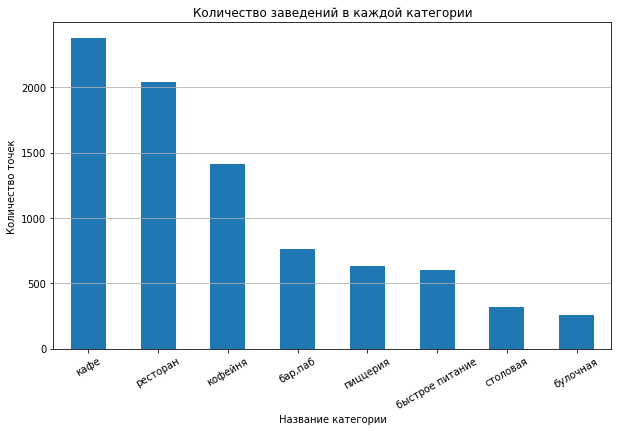

In [26]:
plt.figure(figsize=(10, 6))
df_group_category.plot.bar(df_group_category,
                           title='Количество заведений в каждой категории',
                           ylabel='Количество точек',
                           xlabel='Название категории',
                           rot=30)
plt.grid(axis='y')
plt.show()

In [27]:
df_group_category = round((df.groupby('category')['category']
                     .count()
                     .sort_values(ascending=False) / len(df) * 100), 2)
df_group_category

category
кафе               28.29
ресторан           24.30
кофейня            16.81
бар,паб             9.10
пиццерия            7.53
быстрое питание     7.17
столовая            3.75
булочная            3.05
Name: category, dtype: float64

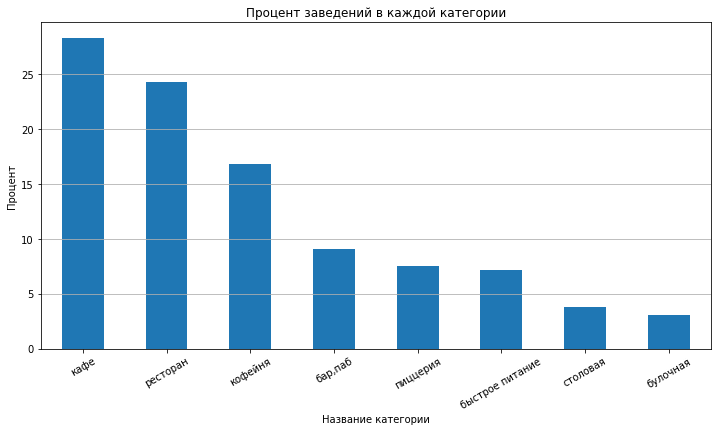

In [28]:
df_group_category = (df.groupby('category')['category']
                     .count()
                     .sort_values(ascending=False) / len(df) * 100)

plt.figure(figsize=(12, 6))
df_group_category.plot.bar(title='Процент заведений в каждой категории',
                           ylabel='Процент',
                           xlabel='Название категории',
                           rot=30)
plt.grid(axis='y')
plt.show()

После чего мы имеем:
1. Самые популярные категории это кафе и рестораны. Каждая из этих категорий имеет более 2000 точек, но кафе составляют более 25% процентов, когда как рестораны чуть менее;
2. Самые не популярные столовые и булочные. Каждая из этих категорий имеет менее 500 точек и составляют менее 5%.

## 3.2. Административные районы Москвы

In [29]:
df_group_category = (df.groupby('district')['district']
                     .count()
                     .sort_values(ascending=True))
df_group_category

district
Северо-Западный      409
Юго-Западный         709
Юго-Восточный        714
Восточный            798
Западный             851
Северо-Восточный     891
Южный                892
Северный             900
Центральный         2242
Name: district, dtype: int64

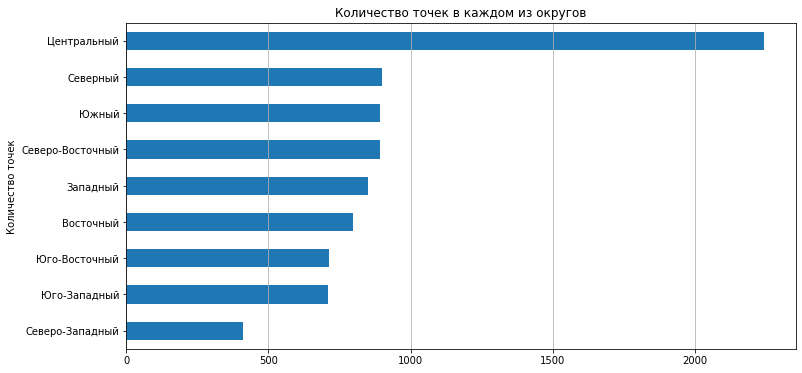

In [30]:
plt.figure(figsize=(12, 6))
df_group_category.plot.barh(df_group_category,
                           title='Количество точек в каждом из округов',
                           ylabel='Название округа',
                           xlabel='Количество точек')
plt.grid(axis='x')
plt.show()

Также изучим доли заведений

In [31]:
df_group_category = round((df.groupby('district')['district']
                     .count()
                     .sort_values(ascending=True) / len(df)) * 100, 2 )
df_group_category

district
Северо-Западный      4.87
Юго-Западный         8.43
Юго-Восточный        8.49
Восточный            9.49
Западный            10.12
Северо-Восточный    10.60
Южный               10.61
Северный            10.71
Центральный         26.67
Name: district, dtype: float64

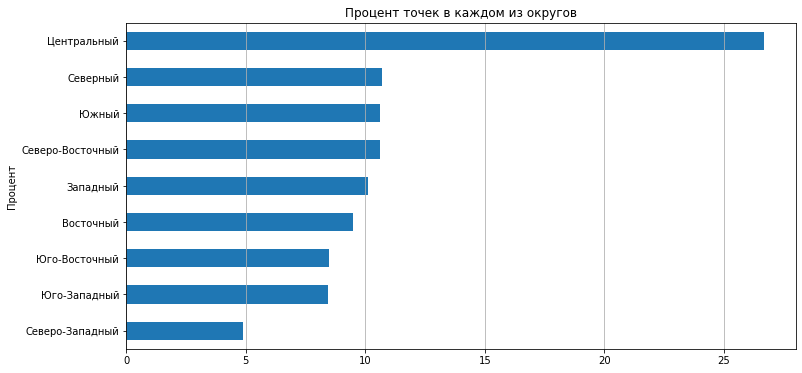

In [32]:
plt.figure(figsize=(12, 6))
df_group_category.plot.barh(df_group_category,
                           title='Процент точек в каждом из округов',
                           ylabel='Название',
                           xlabel='Процент')
plt.grid(axis='x')
plt.show()

Из нашей визуализации мы имеем, что:
1. Самый популярный округ - Центральный;
2. Самый не популярный - Северо-Западный

Изучим самый популярный:

In [33]:
df_popular = df.loc[df['district'] == 'Центральный']

# Группировка данных по категориям
df_popular_group = (df_popular.groupby('category')['category']
                    .count()
                    .sort_values(ascending=True))

# Построение графика
df_popular_group

category
булочная            50
столовая            66
быстрое питание     87
пиццерия           113
бар,паб            364
кофейня            428
кафе               464
ресторан           670
Name: category, dtype: int64

In [34]:
df_popular_group = round(((df_popular.groupby('category')['category']
                    .count()
                    .sort_values(ascending=True)) / len(df_popular)) * 100 , 2)

# Построение графика
df_popular_group

category
булочная            2.23
столовая            2.94
быстрое питание     3.88
пиццерия            5.04
бар,паб            16.24
кофейня            19.09
кафе               20.70
ресторан           29.88
Name: category, dtype: float64

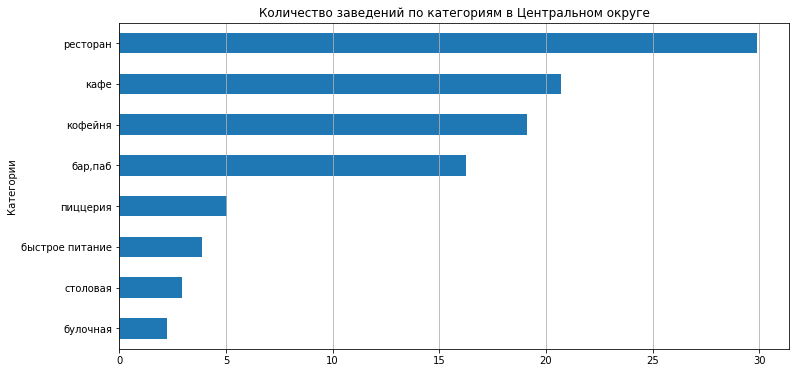

In [35]:
plt.figure(figsize=(12, 6))
df_popular_group.plot(kind='barh', 
                      title='Количество заведений по категориям в Центральном округе',
                      ylabel='Количество',
                      xlabel='Категории')
plt.grid(axis='x')
plt.show()

Мы создали новый датафрейм, который хранит в себе данные по самому популярному округу Москвы. 

Из него получили, что в нём самые популярные категории это Рестораны (29 %). Кафе (20 %), кофейни (19%) и бар/паб (16 %) находятся примерно в одном диапозоне.

## 3.3. Соотношение сетевых и несетевых заведений

Начнём с уточнение информации о том, сколько вообще ресторанов принадлежит сетям, а сколько нет:

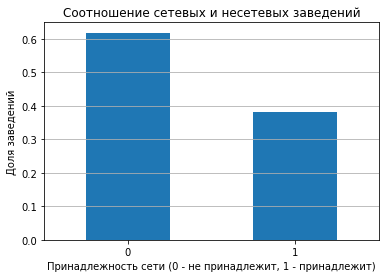

In [36]:
df['chain'].value_counts(normalize=True).plot(
                kind='bar',
                rot=0,
                title='Соотношение сетевых и несетевых заведений',
                xlabel= 'Принадлежность сети (0 - не принадлежит, 1 - принадлежит)',
                ylabel='Доля заведений')
plt.grid(axis='y')
plt.show()

Здесь мы видим, что данные распределены примерно 60/40 (не принадлежит/принадлежит). Теперь узнаем количество сетевых и несетевых заведений в разрезе категорий, для этого можно сделать сводную таблицу:

In [37]:
pivot_chain = df.pivot_table(index=['category', 'chain'], 
                             values='id', 
                             aggfunc=['count'])

# Переименуем столбец для удобства
pivot_chain.columns = ['count']

# Добавляем столбец с процентом
pivot_chain['perc'] = (pivot_chain['count'] / len(df)) * 100

# Выводим сводную таблицу
pivot_chain

count       perc
category        chain                  
бар,паб         0        596   7.090174
                1        169   2.010469
булочная        0         99   1.177730
                1        157   1.867714
быстрое питание 0        371   4.413514
                1        232   2.759933
кафе            0       1599  19.022127
                1        779   9.267190
кофейня         0        693   8.244111
                1        720   8.565310
пиццерия        0        303   3.604568
                1        330   3.925767
ресторан        0       1313  15.619795
                1        730   8.684273
столовая        0        227   2.700452
                1         88   1.046871

<Figure size 864x432 with 0 Axes>

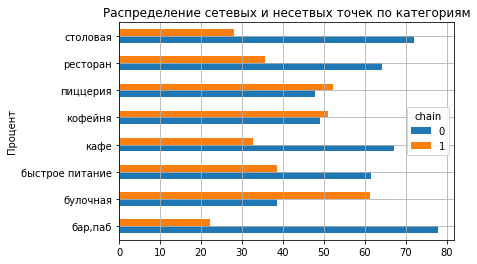

In [38]:
df_group = df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0) * 100
plt.figure(figsize=(12, 6))
df_group.plot(kind='barh',
             title='Распределение сетевых и несетвых точек по категориям',
             ylabel='Категория',
             xlabel='Процент',
             rot=0)
plt.grid()
plt.show()

После построения сводной таблицы, мы можем сделать следующие выводы:
1. По Москве больше всего несетевых заведений (более 60%)
2. Чаще всего сетевыми заведениями становятся Булочные (61%)

## 3.4. Количество посадочных мест в заведениях.

Для начала проверим данные на аномальные данные

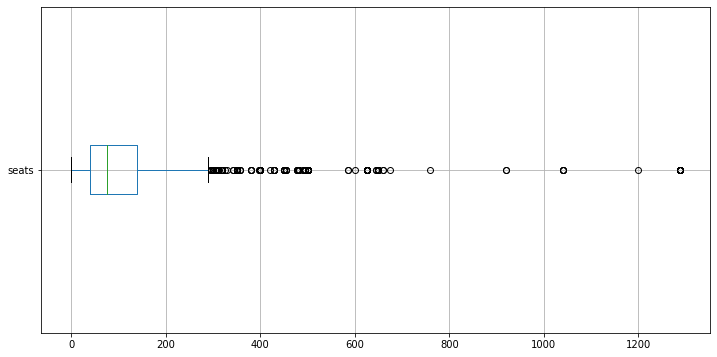

In [39]:
plt.figure(figsize=(12, 6))
boxplot = df.boxplot(
    column = 'seats',
    vert=False
)
plt.grid(True)
plt.show()

По первичному графику можно увидеть, что у нас есть много аномальных значений, проведём более детальную проверку с помощью метода describe.

In [40]:
category_describe = df.groupby('category')['seats'].describe(percentiles=[0.5, 0.6, 0.7, 0.8, 0.95, 0.99])
category_describe

,count,mean,std,min,50%,60%,70%,80%,95%,99%,max
category,,,,,,,,,,,
"бар,паб",468.0,124.532051,145.011566,0.0,82.5,96.000000,120.000000,174.600006,353.899994,660.000000,1288.0
булочная,148.0,89.385132,97.685844,0.0,50.0,84.199997,99.800003,150.000000,276.000000,403.739990,625.0
быстрое питание,349.0,98.891121,106.611740,0.0,65.0,90.000000,120.000000,160.000000,300.000000,402.000000,1040.0
кафе,1218.0,97.512314,117.985085,0.0,60.0,80.000000,100.000000,144.600006,300.000000,597.450012,1288.0
кофейня,751.0,111.199730,127.837776,0.0,80.0,98.000000,120.000000,167.000000,320.000000,625.000000,1288.0
пиццерия,427.0,94.496490,112.282707,0.0,55.0,75.000000,98.199997,150.000000,276.000000,447.980011,1288.0
ресторан,1270.0,121.944092,123.757332,0.0,86.0,100.000000,132.000000,180.000000,323.299988,500.000000,1288.0
столовая,164.0,99.750000,122.951454,0.0,75.5,90.000000,100.000000,130.800003,295.200012,500.890015,1200.0


In [41]:
group_median_seats = df.groupby('category')['seats'].median().sort_values(ascending=False)
group_median_seats

category
ресторан           86.0
бар,паб            82.5
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float32

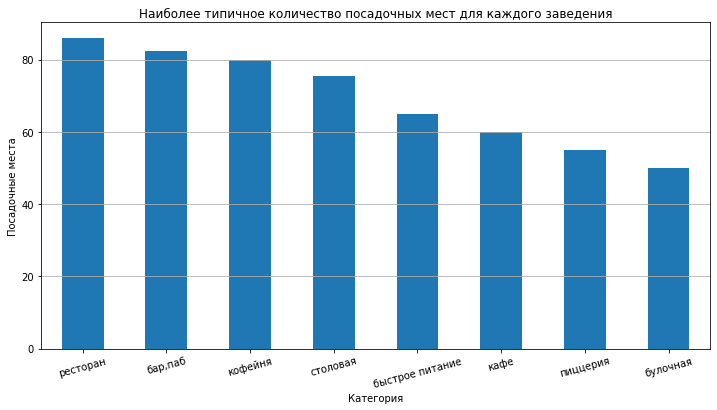

In [42]:
plt.figure(figsize=(12, 6))
group_median_seats.plot(kind='bar',
                        title='Наиболее типичное количество посадочных мест для каждого заведения',
                        rot=15)
plt.grid(axis='y')
plt.xlabel('Категория')
plt.ylabel('Посадочные места')
plt.show()

### Вывод
 Т.к. у многих заведений максимальное количество 1288, можно предположить, что это техническая ошибка. 99% точек во всех категориях имеют до 400-600 посадочных мест.

Можно заметить, что типичный ресторан имеет больше всего посадочных мест (86), когда как булочные и пиццерии наоборот менее всего (50 и 55).


## 3.5. Исследование рейтинга по заведениям

Начнём с проверки столбца `rating` с помощью функции describe

In [43]:
df['rating'].describe()

count    8406.000000
mean        4.229895
std         0.470348
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

В целом все значения находятся в пределах нормы, можно с ними работать.

Рассчитаем средней оценки заведений

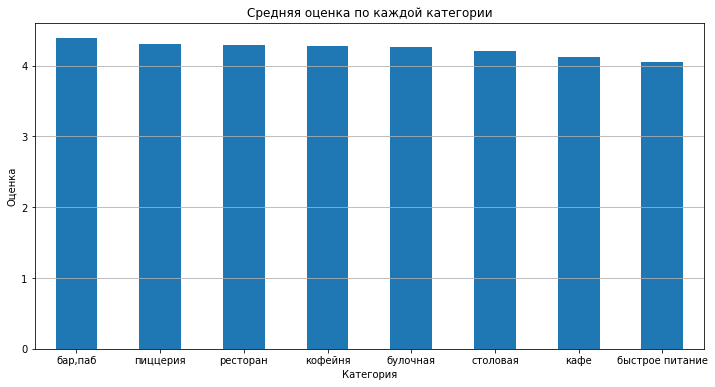

In [44]:
df_group_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
df_group_rating.plot(kind='bar',
                     title='Средняя оценка по каждой категории',
                     rot=0,
                     ylabel='Оценка',
                     xlabel='Категория')
plt.grid(axis='y')
plt.show()

In [45]:
df_group_rating

category
бар,паб            4.387712
пиццерия           4.301264
ресторан           4.290357
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123886
быстрое питание    4.050249
Name: rating, dtype: float32

Данные примерно равны. но Бары имеют наивысшие оценки (4.38), когда как быстрое питание наименьшие (4.05)

## 3.6 Самая сильная корреляция рейтинга заведений

Составим новый датасет со столбцами, которые требуются по заданию и посмотрим на корреляцию среди них.

In [46]:
df_corr = df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'middle_avg_bill']]
phik_matrix = df_corr.phik_matrix()
df_corr = phik_matrix.loc[phik_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
df_corr

interval columns not set, guessing: ['rating', 'chain', 'seats', 'is_24_7', 'middle_avg_bill']


,rating
price,0.262056
middle_avg_bill,0.218416
category,0.198949
district,0.189389
is_24_7,0.160804
chain,0.119071
seats,0.000000


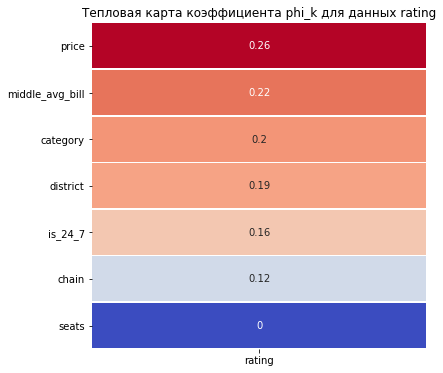

In [47]:
plt.figure(figsize=(6, 6))
sns.heatmap(df_corr,
           annot=True,
           cmap='coolwarm',
           linewidths=0.5,
           cbar=False)

plt.title('Тепловая карта коэффициента phi_k для данных rating')

plt.show()

У поля рейтинг самая сильная корреляция с полем price. Рассмотрим по подробнее

<AxesSubplot:title={'center':'Корреляция рейтинга к цене'}, xlabel='rating', ylabel='price'>

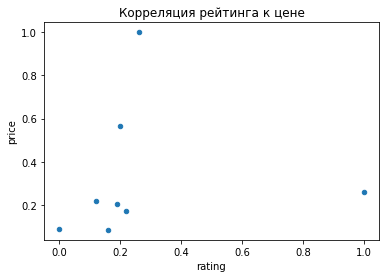

In [48]:
phik_matrix.plot(kind='scatter',
             x='rating',
             y='price',
             title='Корреляция рейтинга к цене')


In [70]:
df.groupby('price')['rating'].mean().sort_values()

price
низкие           4.173077
средние          4.297874
выше среднего    4.386348
высокие          4.436611
Name: rating, dtype: float32

## 3.7 Топ-15 популярных сетей в Москве

Начнём с того, что создадим новый датасет, который будет хранить в себе только информацию про завездения сетей

In [49]:
df_chain = df.loc[df['chain'] == 1]

Затем создадим датасет, прогруппированный по названию и категории, отсортируем по количество точек каждой сети и выведем топ 15.

In [50]:
df_chain = df.loc[df['chain'] == 1]
# Группируем и переименовываем колонку
df_group_name = (
    df_chain.groupby(['name', 'category'])
    .agg(rating_mean=('rating', 'mean'), count=('name', 'count'))
    .sort_values(by=['count'], ascending=False)
)
df_chain = df_group_name.head(15)  
df_chain

,,rating_mean,count
name,category,,
Шоколадница,кофейня,4.178151,119
Домино'с Пицца,пиццерия,4.169737,76
Додо Пицца,пиццерия,4.286487,74
One Price Coffee,кофейня,4.064789,71
Яндекс Лавка,ресторан,3.872464,69
Cofix,кофейня,4.075385,65
Prime,ресторан,4.114285,49
КОФЕПОРТ,кофейня,4.147619,42
Кулинарная лавка братьев Караваевых,кафе,4.394872,39


И выведем 2 графика с сортировкой по количеству и сортировкой по оценке.

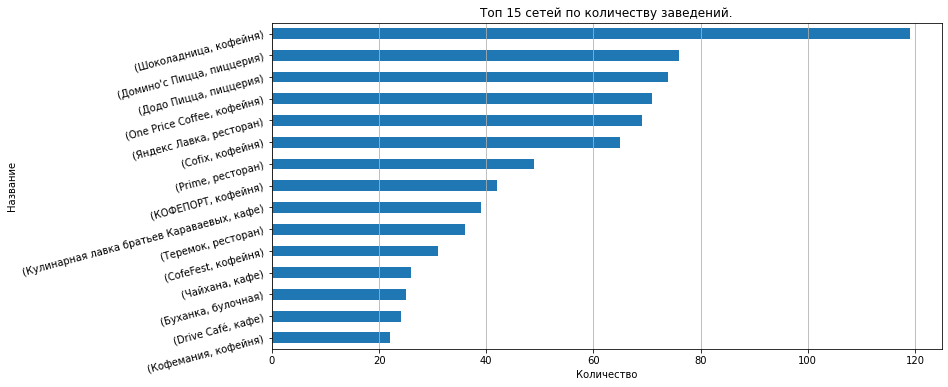

In [51]:
plt.figure(figsize=(12, 6))
df_chain['count'].sort_values(ascending=True).plot(kind='barh',
                                                   title='Топ 15 сетей по количеству заведений.',
                                                   rot=15)
plt.xlabel('Количество')
plt.ylabel('Название')
plt.grid(axis='x')
plt.show()

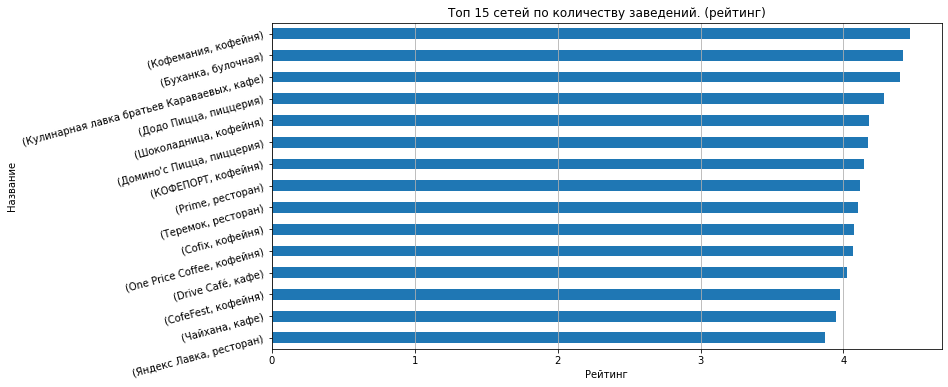

In [52]:
plt.figure(figsize=(12, 6))
df_chain['rating_mean'].sort_values(ascending=True).plot(kind='barh',
                                                         title='Топ 15 сетей по количеству заведений. (рейтинг)',
                                                         rot=15)      
plt.xlabel('Рейтинг')
plt.ylabel('Название')
plt.grid(axis='x')
plt.show()

По результатам мы получили, что сеть `Шоколадница` имеет больше всего точек, но при этом только на 5 месте по рейтингу, а `Кофемания`, хоть и имеет меньше всего точек, но самая высокая по оценкам. Возможно стоит открыть заведение в их сети?

## 3.8. Вариация среднего чека заведения в зависимоти от района Москвы

Изучим данные по выбросам среднего чека


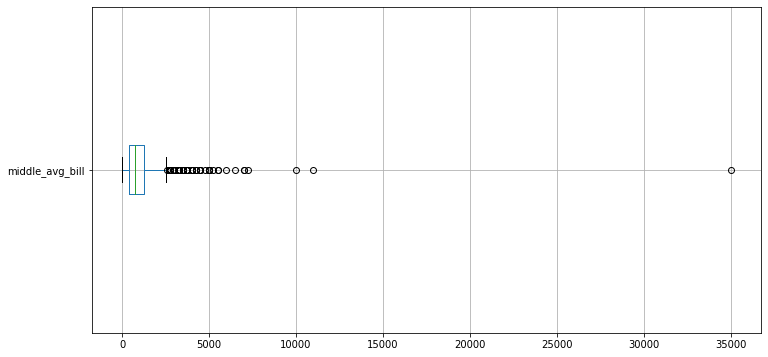

In [53]:
plt.figure(figsize=(12, 6))
boxlpot = df.boxplot(column = 'middle_avg_bill',
                    vert=False)
plt.show()

In [54]:
df['middle_avg_bill'].describe(percentiles=[0.5, 0.6, 0.7, 0.8, 0.95, 0.99])

count     3149.000000
mean       958.053650
std       1009.732849
min          0.000000
50%        750.000000
60%       1000.000000
70%       1200.000000
80%       1470.000000
95%       2250.000000
99%       3750.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

Вычислим медиану среднего чека по каждому району, а также отсортируем по убыванию:

In [55]:
avg_price_district = df.groupby('district')['middle_avg_bill'].median().sort_values(ascending=False)
avg_price_district

district
Западный            1000.0
Центральный         1000.0
Северо-Западный      700.0
Северный             650.0
Юго-Западный         600.0
Восточный            575.0
Северо-Восточный     500.0
Южный                500.0
Юго-Восточный        450.0
Name: middle_avg_bill, dtype: float32

После изучения всех данных в поле `middle_avg_bill`, мы можем сделать следующие выводы:
1. 99% заведений имеют средние чеки до 3750 рублей.
2. Максимальный средний чек 35000. Хороший такой обед :) Скорее всего это связано с какой-то ошибкой. Это явный выброс

Вычислим медиану среднего чека по каждому району, а также отсортируем по убыванию:

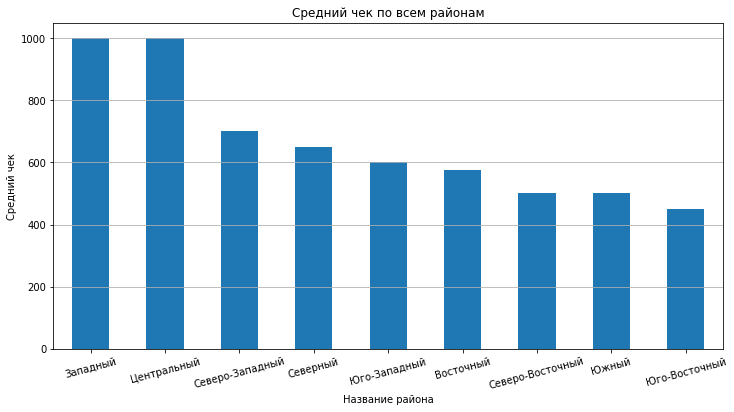

In [56]:
plt.figure(figsize=(12, 6))
avg_price_district.plot(kind='bar',
                        title='Средний чек по всем районам',
                        rot=15)
plt.xlabel('Название района')
plt.ylabel('Средний чек')
plt.grid(axis='y')
plt.show()

#### Вывод
Здесь мы получили интересный результат, западный район по ценам такой же, как и центральный! Но при этом в остальных районах цены значительно меньше.

Если захотите недорого покушать, то Юго-Восточный - отличный вариант! Ведь в нём средний чек всего 450 рублей!

## Вывод по 3 шагу:

Была проделана большая работа по изучению данных, и вот что мы имеем по итогу:
1. Больше всего в Москве заведений в категории кафе, они занимают аж 28%;
2. Самый богатый на различные заведения округ - Центральный. Он имеет 26.6% от всех точек города. Самый не популярный - Северо-Западный, всего лишь 4.9%;
3. Сетевых точек меньше, чем несетевых. Их соотношение примерно 40/60. Но при этом, в категориях: булочная, кофейня и пиццерия, сетевых точек больше, чем несетевых;
4. Самые большое количество посадочных мест понадобиться для ресторанов, бар/паб, кофеин. У них у всех, наиболее типичное количество в районе 80. При этом булочная, ипиццерия и кафе едва достигают 60;
5. Средний рейтинг у всех категорий примерно одинаковый, в районе 4-4.4. Но бары/пабы и пиццерии имеют наивысшие средние оценки -  4.38 и 4.3;
6. У рейтинга самая большая корреляция с полем категорий цен. Это значит, что нужно внимательно следить за ценами, чтоб рейтинг у заведения был выше;
7. Самые популярные сети - кофейни, но пиццерии занимают 2 и 3 место по количеству и 4 и 6 место по рейтингу;
8. Самые дорогие районы - Западный и Центральный (1000 средний чек) , а дешёвые - Южный (500), Северо-Восточный(500) и Юго-восточный(450).

# 4 Детальное исследование пиццерий

## 4.1. Количество пиццерий и их доля в разрезе районов

Если обратиться к пункту 3.1, то мы можем увидеть, что у нас всего 633 заведния в категории пиццерия. Изучим поподробнее их в разрезе района.

Для начала, создадим новый датасет, который будет хранить в себе только информацию о заведениях с пиццей

In [57]:
df_pizza = df.loc[df['category'] == 'пиццерия']
df_pizza.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,all_middle_price,is_24_7
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,500.0,0
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,NaN,NaN,NaN,NaN,0
26,1b831beddbde4c58bc8f6b7fa2c269c2,Пикочино,пиццерия,"Москва, Дмитровское шоссе, 107к2",Северный,"пн-чт 11:00–22:00; пт,сб 11:00–23:00; вс 11:00...",4.5,0,NaN,средние,Средний счёт:300–1500 ₽,900.0,NaN,900.0,0
32,4e5314c970cc47c58e5d24ee3ee70fa9,Додо Пицца,пиццерия,"Москва, Коровинское шоссе, 23, корп. 1",Северный,"ежедневно, 09:00–23:00",4.3,1,46.0,NaN,Средний счёт:328 ₽,328.0,NaN,328.0,0
34,629ac86faa0b4ca49eda1ee27cbda5bb,Домино'с Пицца,пиццерия,"Москва, Клязьминская улица, 11, корп. 4",Северный,"ежедневно, 10:00–23:00",4.2,1,247.0,NaN,Средний счёт:от 500 ₽,500.0,NaN,500.0,0


Теперь прогруппируем точки по районам и узнаем сколько точек в каждом районе есть. Также отсортируем по убыванию.

In [58]:
df_group_pizza = df_pizza.groupby('district')['id'].count().sort_values(ascending=False)
df_group_pizza

district
Центральный         113
Северный             77
Южный                73
Восточный            72
Западный             71
Северо-Восточный     68
Юго-Западный         64
Юго-Восточный        55
Северо-Западный      40
Name: id, dtype: int64

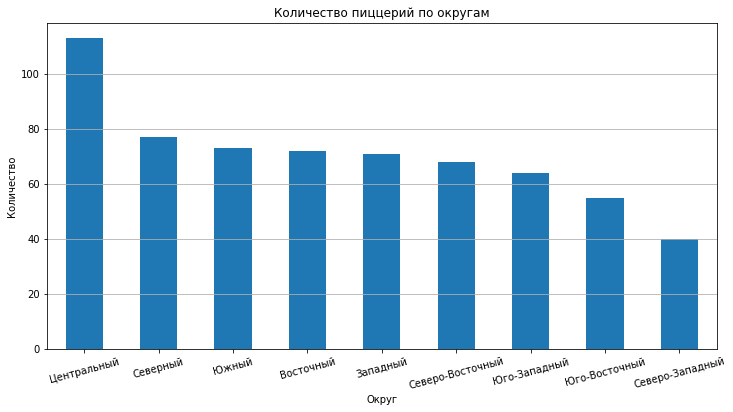

In [59]:
plt.figure(figsize=(12,6))
df_group_pizza.plot(kind='bar',
                    title='Количество пиццерий по округам',
                    rot = 15)
plt.ylabel('Количество')
plt.xlabel('Округ')
plt.grid(axis='y')
plt.show()

Теперь мы знаем, что самый популярный район на пиццерии Центральный, а Северо-Западный наоборот, менее популярный.

Изучим данные также в процентном соотношении

In [60]:
df_group_pizza = df_pizza.groupby('district')['id'].count()
df_total_count = df.groupby('district')['id'].count()
df_total_count

district
Восточный            798
Западный             851
Северный             900
Северо-Восточный     891
Северо-Западный      409
Центральный         2242
Юго-Восточный        714
Юго-Западный         709
Южный                892
Name: id, dtype: int64

In [61]:
df_pizza_prec = round(((df_group_pizza / df_total_count).sort_values(ascending=False)) * 100,  3)
df_pizza_prec 

district
Северо-Западный     9.780
Юго-Западный        9.027
Восточный           9.023
Северный            8.556
Западный            8.343
Южный               8.184
Юго-Восточный       7.703
Северо-Восточный    7.632
Центральный         5.040
Name: id, dtype: float64

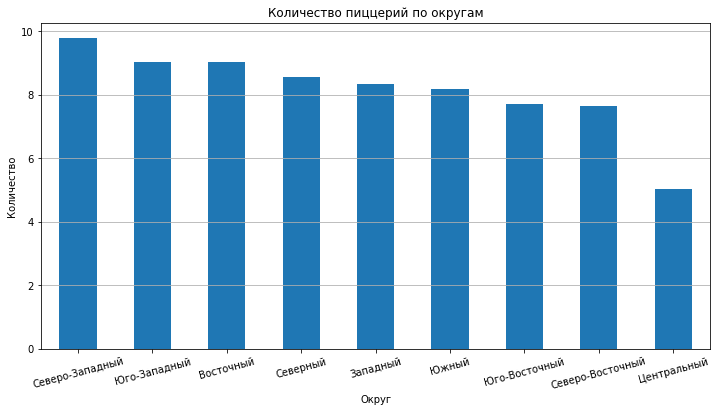

In [62]:
plt.figure(figsize=(12,6))
df_pizza_prec.plot(kind='bar',
                    title='Количество пиццерий по округам',
                    rot = 15)
plt.ylabel('Количество')
plt.xlabel('Округ')
plt.grid(axis='y')
plt.show()

Больше всего пиццерий по соотношению к другим заведениям находится в Северо-Западном районе, почти 10% всех заведний - пиццерии. Центральный же на удивление находится на послледнем месте, всего 5% заведений - пиццерии.

## 4.2. Характеристика средней пиццерии

Изучим средние показатели по всем пиццериям. К сожалению, с кофем в пиццериях всё сложно. Нет достаточной информации для оценки этого показателя. У нас есть информация только о 3 точках

In [63]:
df_pizza_group_mean = df_pizza.groupby('category').agg({'seats':'mean', 'middle_avg_bill':'mean', 'rating':'mean'})
df_pizza_group_mean

,seats,middle_avg_bill,rating
category,,,
пиццерия,94.49649,789.377197,4.301264


По средним показателям, каждая пиццерия имеет 76 сидячих мест, 789 рублей средний чек, а рейтинг составляет 4.3.

Построим графики с информацией о долях сетевых и круглосуточных заведений

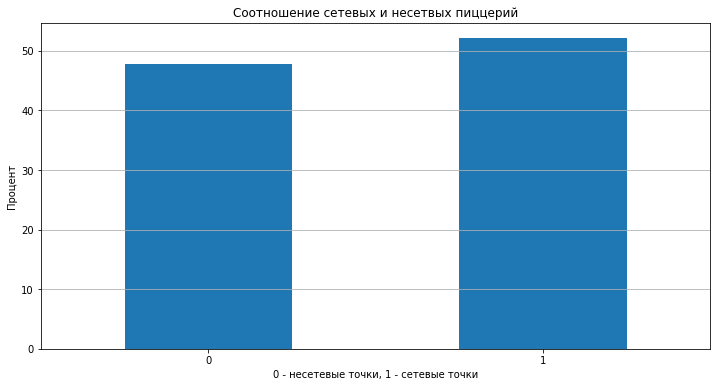

In [64]:
df_group_pizza_chain = round((df_pizza.groupby('chain')['chain'].count() / len(df_pizza)) * 100, 2)
plt.figure(figsize=(12,6))
df_group_pizza_chain.plot(kind='bar',
                    title='Соотношение сетевых и несетвых пиццерий',
                    rot = 0)
plt.ylabel('Процент')
plt.xlabel('0 - несетевые точки, 1 - сетевые точки')
plt.grid(axis='y')
plt.show()

Можно сделать вывод, что сетевых точек всё же больше, но незначительно. Статистика делится примерно 51 на 49.

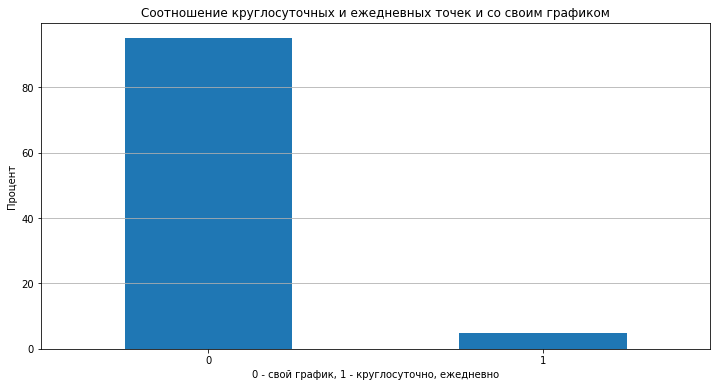

In [65]:
df_group_pizza_24 = round((df_pizza.groupby('is_24_7')['is_24_7'].count() / len(df_pizza)) * 100, 2)
plt.figure(figsize=(12,6))
df_group_pizza_24.plot(kind='bar',
                    title='Соотношение круглосуточных и ежедневных точек и со своим графиком',
                    rot = 0)
plt.ylabel('Процент')
plt.xlabel('0 - свой график, 1 - круглосуточно, ежедневно')
plt.grid(axis='y')
plt.show()

Здесь картина совершенно другая. Практически все пиццерии - не круглосуточные, ежедневные (в районе 95%). 

## 4.3 Сетевые и несетевые пиццерии в Москве по округам

<Figure size 864x432 with 0 Axes>

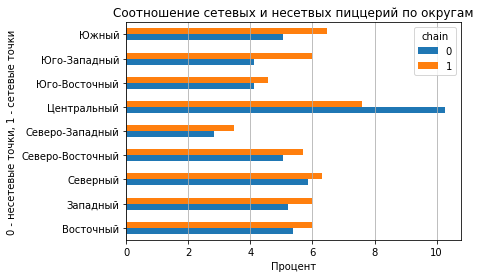

In [66]:


df_group_pizza_chain = round(df_pizza.groupby(['district'])['chain'].value_counts().unstack(fill_value=0) / len(df_pizza) * 100, 2)
plt.figure(figsize=(12,6))
df_group_pizza_chain.plot(kind='barh',
                    title='Соотношение сетевых и несетвых пиццерий по округам',
                    rot = 0)
plt.ylabel('0 - несетевые точки, 1 - сетевые точки')
plt.xlabel('Процент')
plt.grid(axis='x')
plt.show()

Также изучим информацию о пиццериях по соотношению ко всем точкам

In [67]:
df_chain_pizza = df.loc[(df['chain'] == 1) & (df['category'] == 'пиццерия')]
df_chain_pizza.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,all_middle_price,is_24_7
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,500.0,0
32,4e5314c970cc47c58e5d24ee3ee70fa9,Додо Пицца,пиццерия,"Москва, Коровинское шоссе, 23, корп. 1",Северный,"ежедневно, 09:00–23:00",4.3,1,46.0,NaN,Средний счёт:328 ₽,328.0,NaN,328.0,0
34,629ac86faa0b4ca49eda1ee27cbda5bb,Домино'с Пицца,пиццерия,"Москва, Клязьминская улица, 11, корп. 4",Северный,"ежедневно, 10:00–23:00",4.2,1,247.0,NaN,Средний счёт:от 500 ₽,500.0,NaN,500.0,0
63,16ec97cbbf3144e396d2f4be5f75f234,Pizza Hut,пиццерия,"Москва, Череповецкая улица, 12",Северо-Восточный,"ежедневно, 10:00–22:00",4.2,1,12.0,средние,Средний счёт:600–700 ₽,650.0,NaN,650.0,0
88,0ba252477b914f248002226c96a8b583,Zамания,пиццерия,"Москва, Дмитровское шоссе, 163А",Северо-Восточный,"ежедневно, 10:00–22:00",4.9,1,NaN,NaN,NaN,NaN,NaN,NaN,0


In [68]:
df_group_pizza = df_chain_pizza.groupby('district')['id'].count()
df_total_count = df.groupby('district')['id'].count()
df_pizza_prec = round(((df_group_pizza / df_total_count).sort_values(ascending=False)) * 100,  3)
df_pizza_prec 

district
Северо-Западный     5.379
Юго-Западный        5.360
Восточный           4.762
Южный               4.596
Западный            4.465
Северный            4.444
Юго-Восточный       4.062
Северо-Восточный    4.040
Центральный         2.141
Name: id, dtype: float64

По итогу мы имеем, что сетевых пиццерий больше всего в Северо-Западном и Юго-Западном районе (5% от всех заведений)

А в центральном - меньше всего.

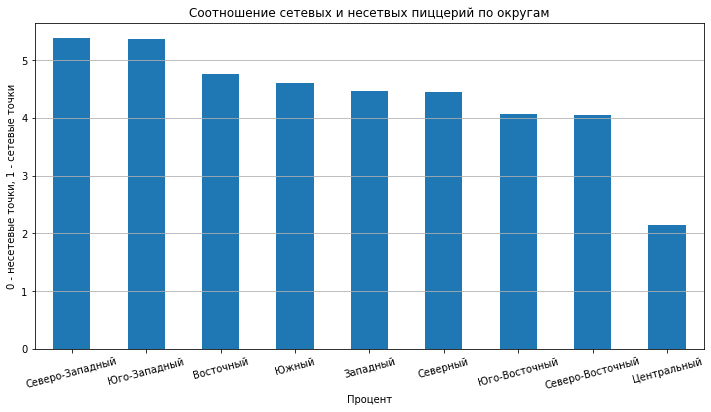

In [69]:
plt.figure(figsize=(12,6))
df_pizza_prec .plot(kind='bar',
                    title='Соотношение сетевых и несетвых пиццерий по округам',
                    rot = 15)
plt.ylabel('0 - несетевые точки, 1 - сетевые точки')
plt.xlabel('Процент')
plt.grid(axis='y')
plt.show()

По графику можно увидеть, что в центре Москвы преобладают именно несетевые точки, которые составляют более 10% от всех пиццерий города, но в остальных других районах преобладают именно сетевые точки.

## Вывод к 4 шагу:
1. Больше всего пиццерий в Центральном районе - 113 точек, а меньше всего в Северо-Западном - 43 точки.
Но при этом, если смотреть по соотношению пиццерий ко всем ресторанам, то Северо-Западный район имеет самый большой процент точек - 9.7 %, а Центральный находится на последним месте с 5%.
2. Практически все пиццерии работаю не круглосуточно и ежедневно, а имеют свой график. При этом сетевых точек примерно столько же, сколько и несетвых;
3. Самое большое количество в процентном соотношение сетевых точек находится в Северо-Западном и Юго-Западных районах (по 5.3% от всех точек).

# 5 Итог

## 5.1. Проделанная работа

Была проделана следующая работа:
1. Предобработка данных. Были заполнены все пропуски, оптимизированы данные, добавленны новые необходимые столбцы, удалены дубликаты;
2. Была предоставлена общая информация обо всём датасете. Количество точек по категориям, количество точек по округам, лучшие сети и т.п..
3. Был проведён детальный анализ пиццерий.

## 5.2. Главные выводы

По проделанной работе можно сделать следующие выводы:

1. Сетевых заведений в Москве меньше, чем несетвых;
3. При открытии заведения, стоит учитывать его местоположение, т.к. всего точек кафе больше, но в центре преобладают именно рестораны;
4. Ресторанов, кафе и кофеин больше всего по всей Москве и в Центральном районе отдельно. Но при этом пабы и бары имеют самые высокие оценки.

## 5.3. Рекомендации

1. Я бы рекомендовал обратить внимание на сетевые точки "Кофемания", их меньше всего в топ-15 сетевых заведений, но при этом они обладают самой высокой оценкой, что говорит о качестве. Также, с учётом того, что это кофейня, не так важно местоположение, т.к. кофейни преобладают по всему городу.
2. Если открывать своё заведение, я бы присмотрелся к Западному району. Т.к. в нём средний чек достаточно высокий(1000 рублей, как и в Центральном). Но при этом точек не так много(851), а значит конкуренции будет меньше. 
3. Пиццерия - это отличная идея. Ведь их не так много (633 по всему городу) и при этом, эта категория имеет средний рейтинг 4.3, что находится на втором месте! Отличные районы для пиццерий: ссылаясь ко второму пункту, то Западный, а также Юго-Западный и Северо-Западный. Ведь там пиццерий больше всего, а значит и высокий спрос!